In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
#read csv
carPrice = pd.read_csv(f"C:\\Users\\lala7\\Desktop\\研究所\\碩一上\\製造數據科學\\HW\\MDS_Assignment02\\CarPrice_Assignment.csv") 
carPrice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [46]:
carPrice_num = carPrice.select_dtypes(include=['number'])
carPrice_num = carPrice_num.drop(columns=['car_ID', 'symboling'])
columns = carPrice_num.columns.to_list()
columns #14個

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [47]:
#14個特徵，訓練集102個樣本
X = carPrice_num.iloc[:, :-1]
y = carPrice_num.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [48]:
model = sm.OLS(y_train, X_train).fit()
summary = model.summary()

In [15]:
summary_table = summary.tables[1]
summary_df = pd.DataFrame(summary_table.data[1:], columns=summary_table.data[0])
summary_df['P>|t|'] = pd.to_numeric(summary_df['P>|t|'])

sorted_summary = summary_df.sort_values(by='P>|t|')
print(sorted_summary)

                            coef    std err          t  P>|t|     [0.025  \
5         enginesize    115.4853     20.352      5.674  0.000     75.046   
7             stroke  -3749.9997   1231.290     -3.046  0.003  -6196.547   
1          carlength   -209.5968     90.784     -2.309  0.023   -389.983   
8   compressionratio    280.5145    123.971      2.263  0.026     34.186   
0          wheelbase    319.8361    149.506      2.139  0.035     22.771   
2           carwidth    432.3939    238.279      1.815  0.073    -41.060   
11           citympg   -483.8833    276.086     -1.753  0.083  -1032.460   
10           peakrpm      1.3469      1.035      1.302  0.196     -0.709   
3          carheight   -217.4087    185.447     -1.172  0.244   -585.887   
4         curbweight      2.6481      2.333      1.135  0.259     -1.988   
6          boreratio  -1894.7276   1703.686     -1.112  0.269  -5279.916   
9         horsepower    -10.7692     24.509     -0.439  0.661    -59.468   
12        hi

In [49]:
column_index_pvalue = sorted_summary.iloc[:, 0].values.tolist()
print(column_index_pvalue)

['enginesize', 'stroke', 'carlength', 'compressionratio', 'wheelbase', 'carwidth', 'citympg', 'peakrpm', 'carheight', 'curbweight', 'boreratio', 'horsepower', 'highwaympg']


In [50]:
df = pd.DataFrame()
rsquared = []
feature_count = [i for i in range(1, 14)]

for i in column_index_pvalue:
    selected_column = X_train[i]
    df = pd.concat([df, selected_column], axis=1)
    model2 = sm.OLS(y_train, df).fit()
    rsquared.append(model2.rsquared.round(5))

print(rsquared)
print(feature_count)

[0.91797, 0.94298, 0.94422, 0.94427, 0.94461, 0.94478, 0.96056, 0.96122, 0.96178, 0.96223, 0.96286, 0.96291, 0.96295]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


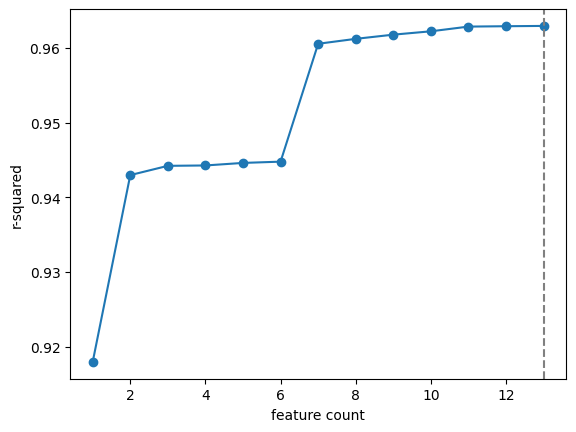

In [51]:
# 畫折線圖
plt.plot(feature_count, rsquared, marker='o', linestyle='-')
plt.axvline(x=13, color='grey', linestyle='--')


plt.xlabel('feature count')
plt.ylabel('r-squared')
plt.show()
